# FFT Demonstration

## Fourier Transforms

A Fourier Transform is a mathematical method to take a time dependant signal and break it down into a sum of sinusoidal frequences. The tranformed function, denoted $\hat{\mathscr{f}}$ is defined:

$$\hat{\mathscr{f}}(\omega) = \int^{\infty}_{-\infty}\mathscr{f}(x)e^{-2\pi i x \omega} dx$$

The inverse transformation function is:

$$\mathscr{f}(x) = \int^{\infty}_{-\infty} \hat{\mathscr{f}}(\omega)e^{2\pi i \omega x} d \omega $$

There is a limit on the maximum frequency that can be detected from this. This limit is dependant on the average time sample rate.

It is :

$$\omega_{max} = \frac{1}{2 \bar{\Delta t}} $$

Where $\bar{\Delta t}$ is your average sampling time.

## Discrete Fourier Transform

Primarily from [Discrete Fourier Transfrom (numpy.fft) - SciPy.org](http://docs.scipy.org/doc/numpy-1.10.0/reference/routines.fft.html#module-numpy.fft "Discrete Fourier Transform"):

Used primarily in computing, and it is capable of handling both real and imaginary signals and outputs.
For numpy, it uses

$$A_k = \sum^{n-1}_{m=0} a_m e^{\Large{\{}-2\pi i \frac{mk}{n} \Large{\}}} $$
where $a_m = e^{\large{\{}2\pi i \mathscr{f}m\Delta t\large{\}}}$, and $\Delta t$ is the sample interval for a single frequency $\mathscr{f}$.

If a signal array $a$, $n$ elements long is input, such

```python
A = np.fft.fft(a,n)
```

Then the first $\frac {n} {2} $ elements correspond to the positive frequencies, and the second $ \frac n 2 $ correspond to the negative frequencies, which are the complex conjugate of the positive frequencies. This means that when a real signal is input, the negative frequencies given no more information than the positive frequencies.

Also, if a is a time dependant signal, then 
```python
A = np.fft.fft(a)
```
Then ```python np.abs(A) ``` is the amplitude spectrum and ```python np.abs(A)**2 ``` is the power spectrum.

To generate the frequency to correspond to the Fourier transform, for a time array $t$

```python
freq = np.fft.fftfreq(t.shape[-1], d=1/sample_rate)
```

For real signals, all of this can be made much easier by using np.fft.rfft and np.fft.rfftfreq, as such

```python
A = np.fft.rfft(a)
freq = np.fft.rfftfreq(t.shape[-1], d=1/sample_rate)
AAmplitude = 2.0/len(a) * np.abs(A)
APower = AAmplitude**2
```
No cropping of the second half the array is required in this case.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


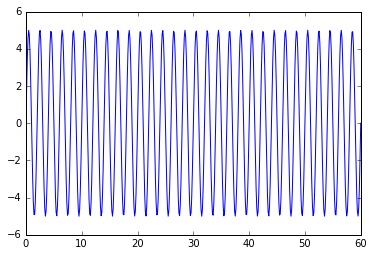

/home/silver/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


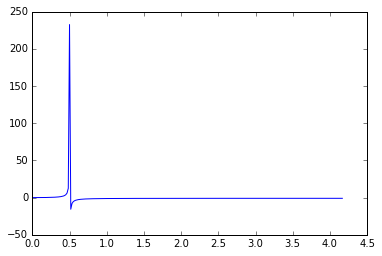

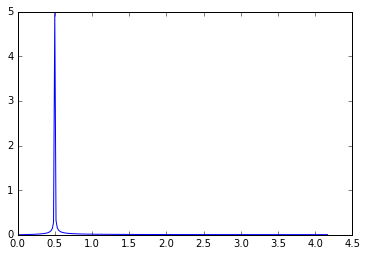

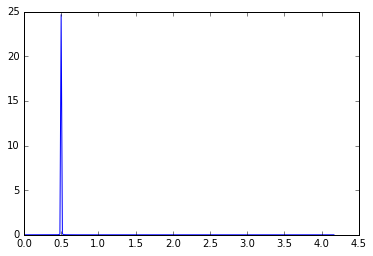

In [2]:
t = np.linspace(0.0, 60.0, 500)
a = 5.0*np.sin(0.5*2.0*np.pi*t)
A = np.fft.rfft(a)
AAmplitude = np.abs(A)*2.0/(len(a))
Apower = AAmplitude**2
freq = np.fft.rfftfreq(t.shape[-1], d=60.0/500.0)
#freq = freq[:len(freq)/2]
plt.plot(t, a)
plt.show()

plt.plot(freq, A)
plt.show()

plt.plot(freq, AAmplitude)
plt.show()

plt.plot(freq, Apower)
plt.show()

## Multiple Frequencies

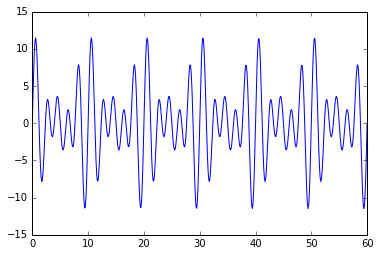

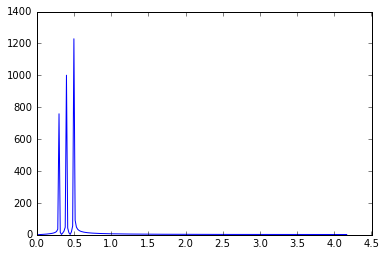

In [3]:
t = np.linspace(0.0, 60.0, 500)
a = 5.0*np.sin(0.5*2.0*np.pi*t) + 4.0*np.sin(0.4*2.0*np.pi*t) + 3.0*np.sin(0.3*2.0*np.pi*t)

A = np.abs(np.fft.rfft(a))
freq = np.fft.rfftfreq(t.shape[-1], d = 60.0/500.0)

plt.plot(t, a)
plt.show()

plt.plot(freq, A)
plt.show()

## Irregular Time Samples

The FFT assumes regular time samples, and not having such can cause errors, resulting in a messy transformation output.

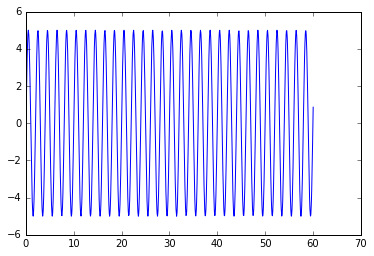

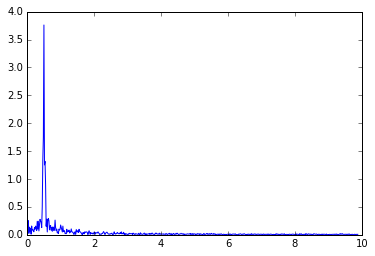

In [20]:
diffT = [0.0]
while max(diffT)<60.0:
    diffT.append(max(diffT)+np.random.random()*0.1)
diffT = np.array(diffT)


b = 5.0 * np.sin(0.5*2.0*np.pi*diffT)

B = np.fft.rfft(b)
B = 2.0/len(b) * np.abs(B)
freq = np.fft.rfftfreq(diffT.shape[-1], d=max(diffT)/len(diffT))

plt.plot(diffT, b)
plt.show()

plt.plot(freq, B)
plt.show()




### To Fix: Fit a curve and take regular samples of that

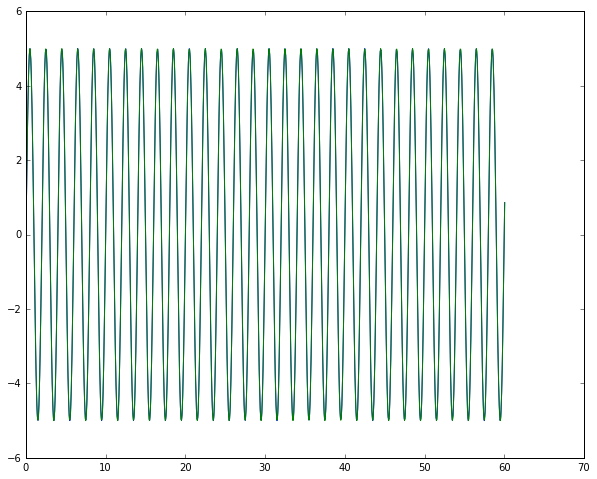

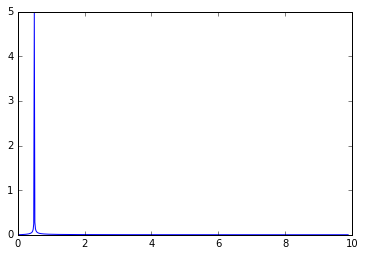

In [27]:
from scipy.optimize import curve_fit

def sinFit(X, A, m, d):
    return A*np.sin(m*X*2.0*np.pi+d)



x = np.linspace(min(diffT), max(diffT), len(diffT))


guess = [5.0, 0.5, 0]
fitParams, fitCovar = curve_fit(sinFit, diffT, b, p0=guess)
y = sinFit(x, fitParams[0], fitParams[1], fitParams[2])

plt.figure(figsize=(10,8))
plt.plot(diffT, b)

plt.plot(x, y)
plt.show()

Y = 2.0/len(x) * np.abs(np.fft.rfft(y))
freqX = np.fft.rfftfreq(len(x), d=max(x)/len(x))

plt.plot(freqX, Y)
plt.show()

# Start and end points


## Original Signals

0.0 -1.22464679915e-14
-4.27759989488 2.80050426049


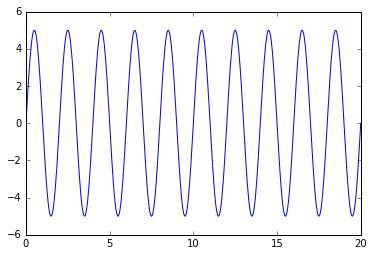

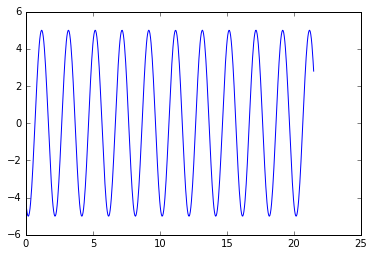

In [6]:
t = np.linspace(0.0, 20, 500)
AltT = np.linspace(0.0, 20+1.484, 500)

a = 5.0*np.sin(0.5*2.0*np.pi*t)
b = 5.0*np.sin(0.5*2.0*np.pi*AltT + 67)

print(a[0], a[-1])
print(b[0], b[-1])

A = 2.0/len(a)*np.abs(np.fft.rfft(a))
B = 2.0/len(b)*np.abs(np.fft.rfft(b))

freqA = np.fft.rfftfreq(t.shape[-1], d=max(t)/len(t))
freqB = np.fft.rfftfreq(AltT.shape[-1], d=max(AltT)/len(AltT))

plt.plot(t, a)
plt.show()

plt.plot(AltT, b)
plt.show()



## Transformed Signals

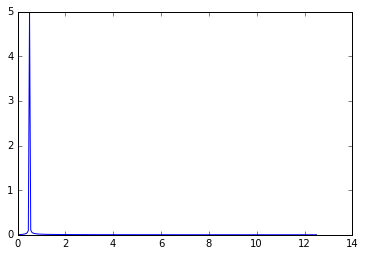

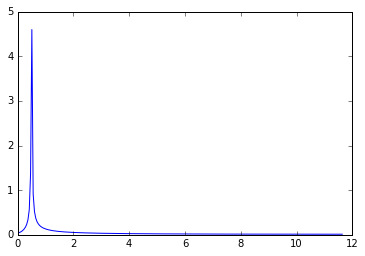

In [7]:
plt.plot(freqA, A)
plt.show()

plt.plot(freqB, B)
plt.show()

## Signals Changed to a Pulse, New Transformed

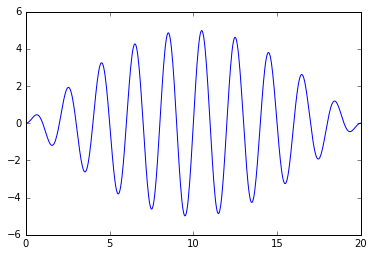

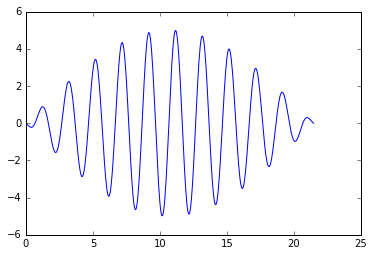

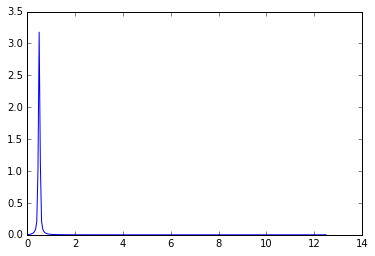

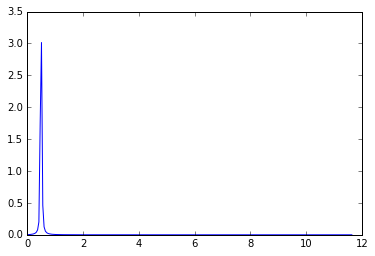

In [8]:
a = a*np.sin(t/max(t)*np.pi)
b = b*np.sin(AltT/max(AltT)*np.pi)

A = 2.0/len(a)*np.abs(np.fft.rfft(a))
B = 2.0/len(b)*np.abs(np.fft.rfft(b))

plt.plot(t, a)
plt.show()

plt.plot(AltT, b)
plt.show()

plt.plot(freqA, A)
plt.show()

plt.plot(freqB, B)
plt.show()